In [4]:
using Winston;using Color;

In [2]:
include("sampledata.jl")

sampledata

In [3]:
nsample=4096

4096

In [8]:
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01)

(linspace(0.0,314.1592653589793,512),[1.0,0.815801,0.327495,-0.286519,-0.794761,-0.999792,-0.816658,-0.31099,0.321115,0.827043  …  0.867022,-0.409309,-0.20065,0.732482,-0.991211,0.887133,-0.463992,-0.122018,0.661909,-0.968869],linspace(1.0,4.141592653589793,512),0.01)

In [10]:
include("jnufft.jl");

In [11]:
include("cohenclass.jl");

In [12]:
import DSP

In [13]:
z=DSP.Util.hilbert(y);

In [382]:
tfr=cohenclass.tfrwv(z);

Single Wigner Ville


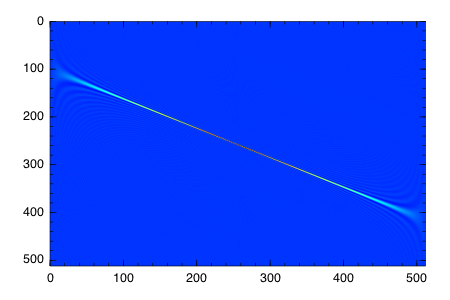

In [383]:
imagesc(tfr)

In [ ]:
### Wigner Ville distribution for the linear FM with Gaussian noises 

In [14]:
using Distributions

In [385]:
d = Normal()

Distributions.Normal(μ=0.0, σ=1.0)

In [386]:
sn=1.0;

In [387]:
ynoise=y+rand(d,nsample)*std(y)*sn;

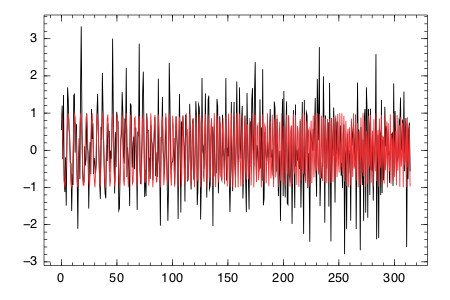

In [388]:
display(plot(x,ynoise,x,y))

In [389]:
zn=DSP.Util.hilbert(ynoise);

In [390]:
tfrn=cohenclass.tfrwv(zn);

Single Wigner Ville


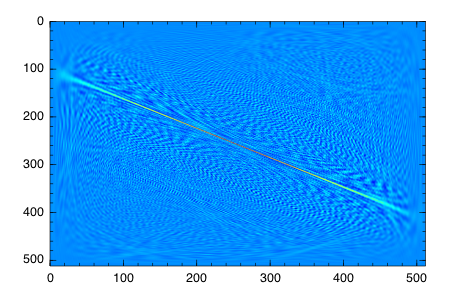

In [391]:
imagesc(tfrn)

In [15]:
include("extif.jl");

In [393]:
indf=extif.aveif(tfr);

In [394]:
indfn=extif.aveif(tfrn);

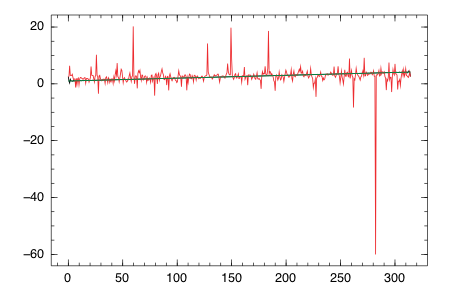

In [395]:
display(plot(x,ynorm*indf,x,ynorm*indfn,x,iw))

### Cross-Wigner Ville

In [ ]:
#### initial guess

In [17]:
include("polywv.jl")

polywv

In [18]:
include("estif.jl")

estif

In [19]:
import estif

In [20]:
dx=x[2]-x[1]

0.6147930828942844

In [441]:
indfn1=estif.ifestxvwd(zn,ynorm,dx,2);

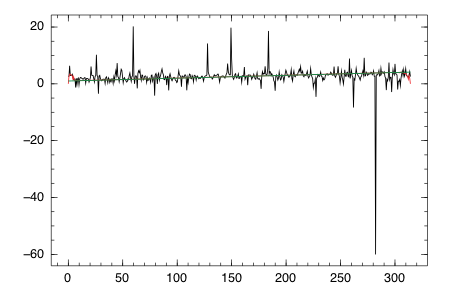

In [444]:
display(plot(x,ynorm*indfn,x,ynorm*indfn1,x,iw))

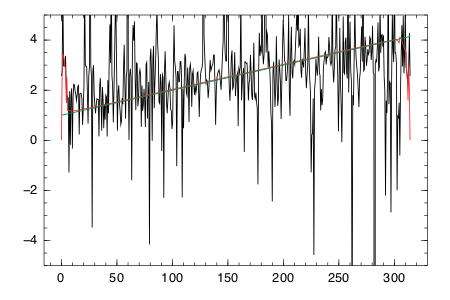

In [445]:
ylim(-5,5)

In [307]:
indfnc=estif.ifestxvwd(zn,ynorm,dx,20);

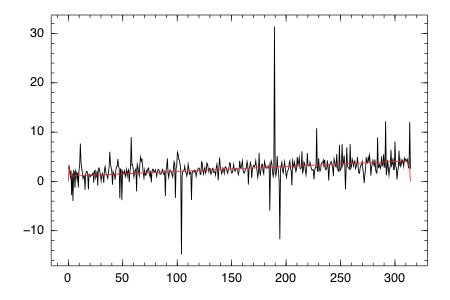

In [308]:
display(plot(x,ynorm*indfn,x,ynorm*indfnc))

In [ ]:
### cross pseudo Wigner Ville

In [448]:
tfrnp=cohenclass.tfrpwv(zn);

Single pseudo Wigner Ville


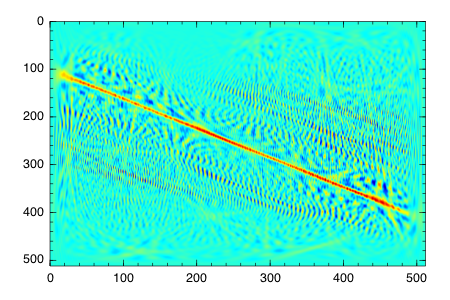

In [449]:
imagesc(tfrnp)

In [450]:
indfnp=extif.aveif(tfrnp);

In [451]:
indfncp=estif.ifestxpvwd(zn,ynorm,dx,10);

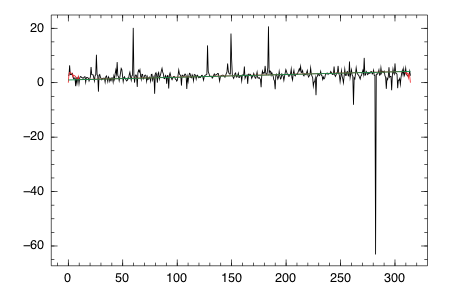

In [453]:
display(plot(x,ynorm*indfnp,x,ynorm*indfncp,x,iw))

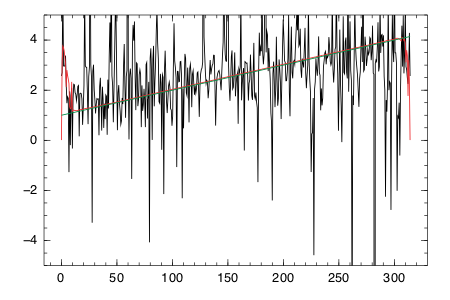

In [454]:
ylim(-5,5)

In [ ]:
### the case of "sin fm" 

In [21]:
xs,ys,iws,ynorms=sampledata.genfm(nsample,1.0,0.1,1.0,100pi)

(linspace(0.0,314.1592653589793,512),[1.0,0.779935,0.216825,-0.441237,-0.905188,-0.972526,-0.615534,0.00835611,0.627392,0.974897  …  0.974897,0.627392,0.00835611,-0.615534,-0.972526,-0.905188,-0.441237,0.216825,0.779935,1.0],[1.1,1.09981,1.09925,1.0983,1.09699,1.09531,1.09327,1.09088,1.08815,1.08508  …  1.08508,1.08815,1.09088,1.09327,1.09531,1.09699,1.0983,1.09925,1.09981,1.1],0.01)

In [31]:
sn=0.5

0.5

In [32]:
d = Normal()

Distributions.Normal(μ=0.0, σ=1.0)

In [33]:
yns=ys+rand(d,nsample)*std(ys)*sn;

In [34]:
zns=DSP.Util.hilbert(yns);

In [39]:
fin=collect(linspace(50,150,1024));

#### Wigner Ville with NUFFT

In [46]:
tfrns=cohenclass.tfrwv(zns,NaN,NaN,fin,NaN,0);

Single Wigner Ville
Use nufft.


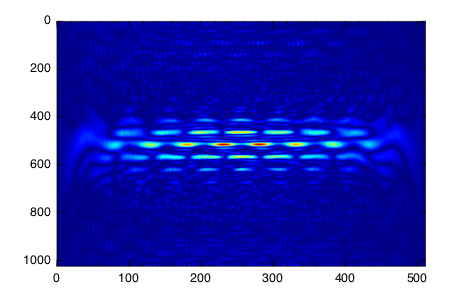

In [47]:
imagesc(abs(tfrns))

In [51]:
indfns=extif.maxif(abs(tfrns));

In [55]:
dxs=xs[2]-xs[1]

0.6147930828942844

In [60]:
indfnsc,tfrni=estif.ifestxvwd(zns,ynorms,dx,3,fin[round(Int,indfns)],NaN,NaN,fin,true);

Cross Wigner Ville
Use nufft.
Cross Wigner Ville
Use nufft.
Cross Wigner Ville
Use nufft.


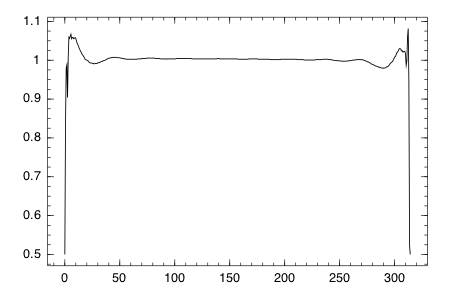

In [61]:
plot(xs,ynorms*indfnsc)

#### Pseudo Wigner Ville with NUFFT

In [57]:
tfrnsp=cohenclass.tfrpwv(zns,NaN,NaN,fin,NaN,NaN,0);

Single pseudo Wigner Ville
Use nufft.


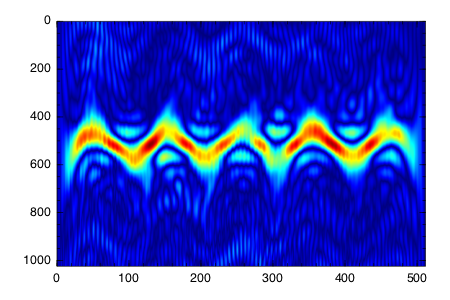

In [58]:
imagesc(abs(tfrnsp))

In [59]:
indfnsp=extif.maxif(real(tfrnsp));

In [64]:
include("estif.jl");

In [65]:
indfnscp,tfrnip=estif.ifestxpvwd(zns,ynorms,dx,3,fin[round(Int,indfnsp)],NaN,NaN,fin,true);

Cross pseudo Wigner Ville
Use nufft.
Cross pseudo Wigner Ville
Use nufft.
Cross pseudo Wigner Ville
Use nufft.


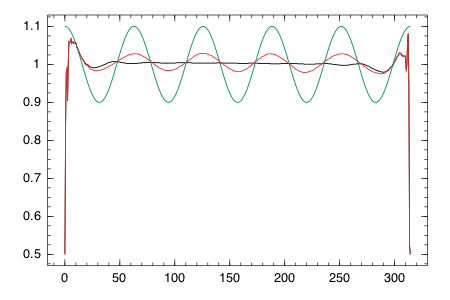

In [66]:
display(plot(xs,ynorms*indfnsc,xs,ynorms*indfnscp,xs,iws))

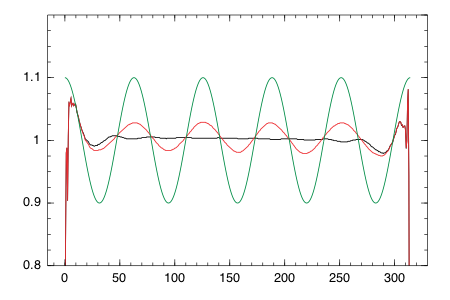

In [67]:
ylim(0.8,1.2)

#### Comment:  the retrieved signals are smeared 